# Assignment 1 - group 55


In [1]:
%pip install calplot

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from urllib.request import urlopen
import json
import plotly.express as px
import plotly.graph_objects as go
import calendar
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
from google.colab import drive
import calplot
import warnings
warnings.filterwarnings("ignore")

In [3]:
drive.mount('/content/drive')



> Load the initial data



In [4]:
path = "/content/drive/MyDrive/Colab Notebooks/data/Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240129.csv"
data = pd.read_csv(path)
data['Date'] = pd.to_datetime(data['Date'])
data = data[~(data['Date'] > '2017-12-31')]

## A1 Part 1: Visualizing patterns in the data

In this sub-assignment, we recreate some of the plots from Week 2. We look only at the focus-crimes.

For each set of plots below, describe the plots (as you would in the figure text in a report or paper), and pick a few aspects that stand out to you and comment on those (we provided a couple of ideas during class but it's OK to add more).

* **First create the week-day plots, the months, the 24-hour cycle, and the 168 hours of the week as barcharts (Week 2, Part 2).**

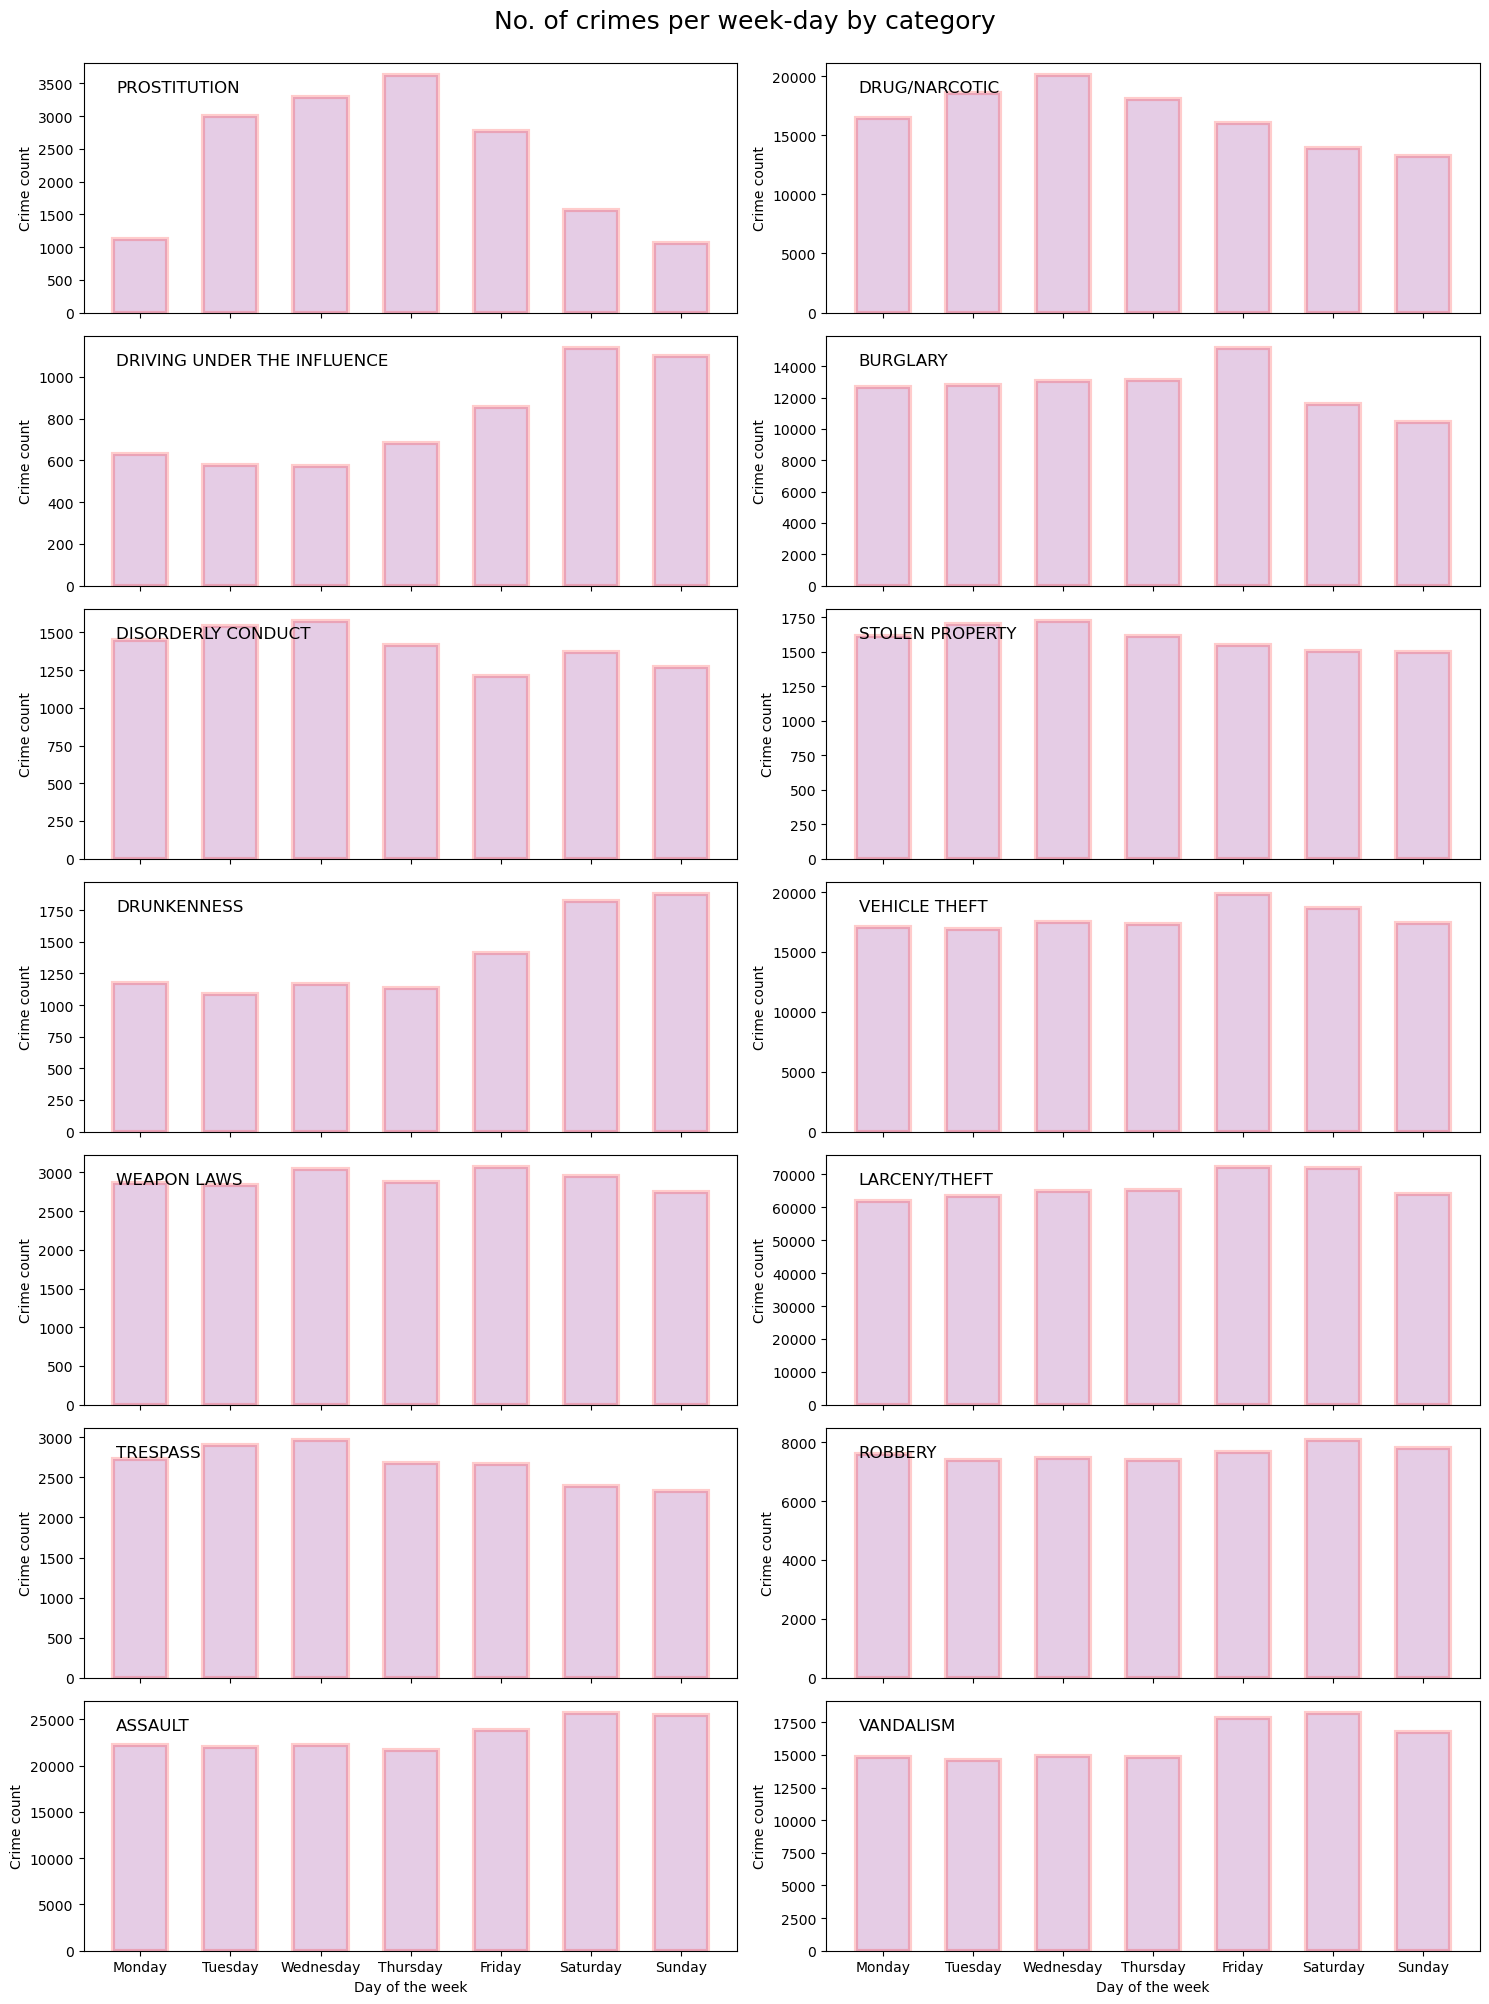

In [5]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

focusdata = data[data['Category'].isin(focuscrimes)]
cats = list(calendar.day_name)
cat_type = CategoricalDtype(categories=cats, ordered=True)
focusdata['DayOfWeek'] = focusdata['DayOfWeek'].astype(cat_type)

grouped_data = focusdata.groupby(['DayOfWeek', 'Category']).size().reset_index(name='crime_count')

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 20), sharex=True)
axes = axes.flatten()

for i, crime in enumerate(list(focuscrimes)):
    ax = axes[i]
    crime_data = grouped_data[grouped_data['Category'] == crime]
    ax.bar(crime_data['DayOfWeek'], crime_data['crime_count'], alpha=0.2, color='purple', edgecolor='red', linewidth=3, width=0.6)
    ax.set_title(f'{crime}', loc='left', y=0.85, x=0.05)
    ax.set_ylabel('Crime count')
    if i>=12:
      ax.set_xlabel('Day of the week')
fig.suptitle('No. of crimes per week-day by category', size=18, y=1.0)
fig.tight_layout()

> The figure above illustrates the distribution of registered crimes across each weekday, categorized by crime types.

> Overall, there is significant variation in the results, with no single day consistently having the highest or lowest crime numbers across all categories. Some crime categories, such as robbery, stolen property, or assault, exhibit relatively consistent numbers throughout the week. In contrast, others, like prostitution, drunkenness, or DUI, show notable fluctuations. For instance, prostitution sees higher numbers from Tuesday to Friday, while DUI and drunkenness peak during the weekends.

> It's essential to note the differing Y scales for each crime type. For example, although the charts for larceny/theft and weapon laws may appear similar, the Y-axis for theft extends up to 70,000, whereas for weapon laws, it only reaches 3,000, indicating a significant disparity—over 23 times less for weapon laws. This implies that while the weekly patterns for these crimes may resemble each other, one crime occurs far more frequently than the other.

> An intriguing comparison can be drawn between the patterns of drunkenness and drug/narcotics-related crimes. Despite both being linked to substance abuse, drunkenness primarily occurs on weekends, whereas drug/narcotic incidents are more frequent outside of weekends, peaking on Wednesdays.

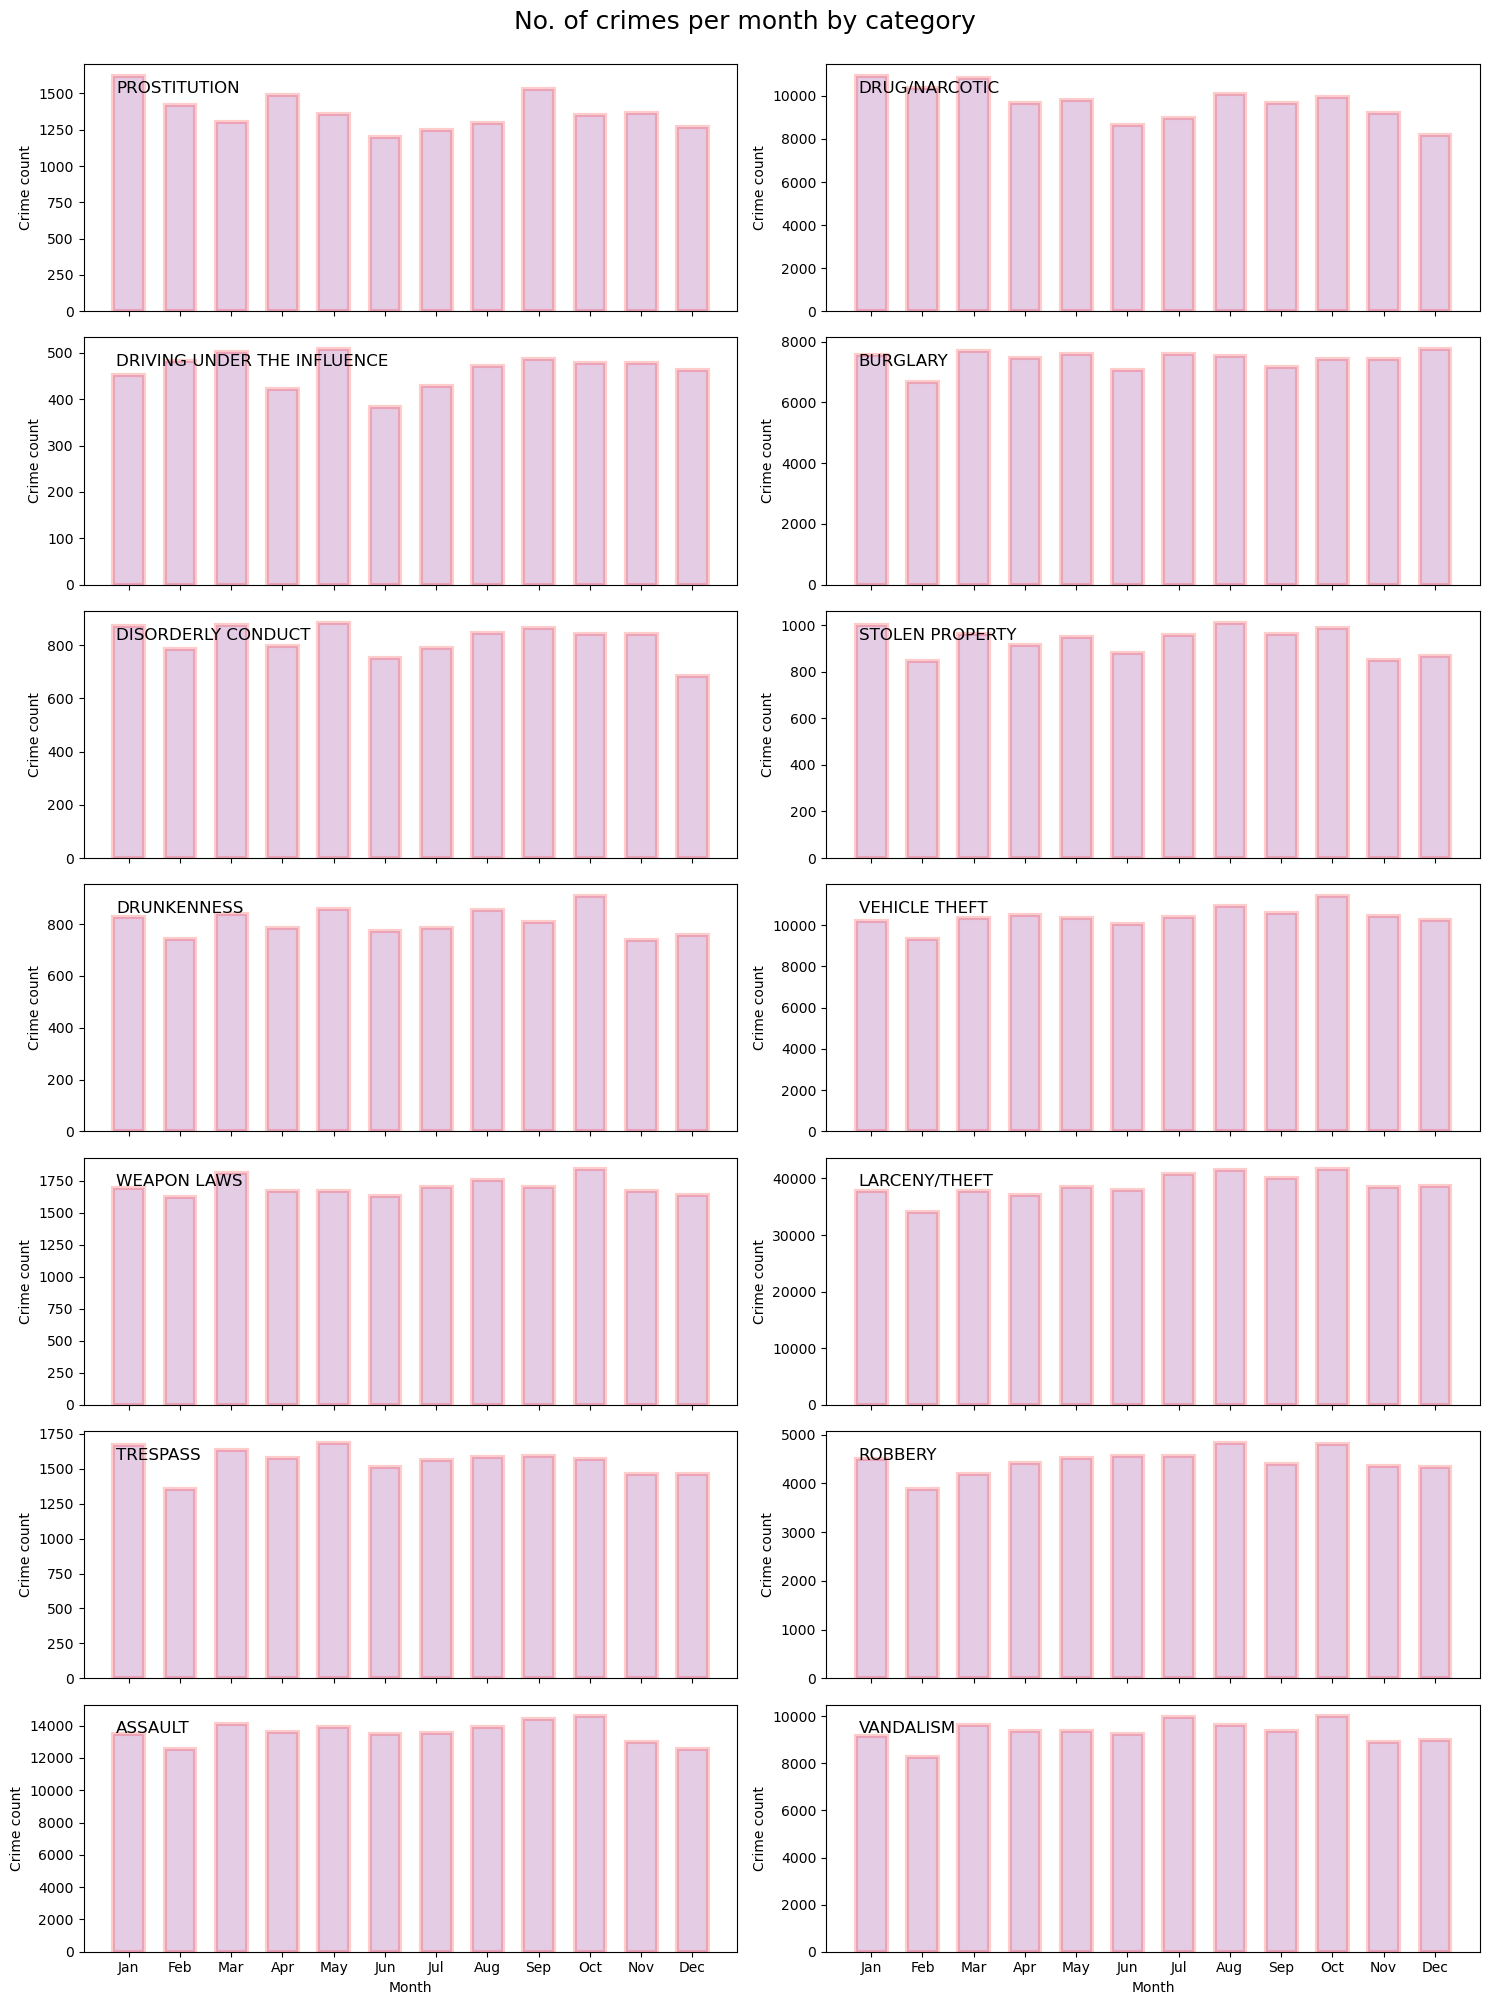

In [6]:
focusdata['Month'] = focusdata['Date'].dt.month
focusdata['Month'] = focusdata['Month'].apply(lambda x: calendar.month_abbr[x])
months_short = calendar.month_abbr[1:]
cat_type = CategoricalDtype(categories=months_short, ordered=True)
focusdata['Month'] = focusdata['Month'].astype(cat_type)

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 20), sharex=True)
axes = axes.flatten()

grouped_data = focusdata.groupby(['Month', 'Category']).size().reset_index(name='crime_count')

for i, crime in enumerate(list(focuscrimes)):
    ax = axes[i]
    crime_data = grouped_data[grouped_data['Category'] == crime]
    ax.bar(crime_data['Month'], crime_data['crime_count'], alpha=0.2, color='purple', edgecolor='red', linewidth=3, width=0.6)
    ax.set_title(f'{crime}', loc='left', y=0.85, x=0.05)
    ax.set_ylabel('Crime count')
    if i>=12:
      ax.set_xlabel('Month')
fig.suptitle('No. of crimes per month by category', size=18, y=1.0)
fig.tight_layout()

> The figure above illustrates the monthly distribution of registered crimes across various crime categories. Overall, there is no significant variation observed between months for any type of crime.

>October emerges as the most common month for the highest number of crimes, encompassing approximately six out of the fourteen categories. Conversely, February consistently records the lowest number of crimes across roughly seven out of fourteen categories, possibly due to its shorter duration.

>Certain crimes, such as prostitution or drug/narcotics-related offenses, experience a noticeable decline in numbers during the summer months, specifically June and July.

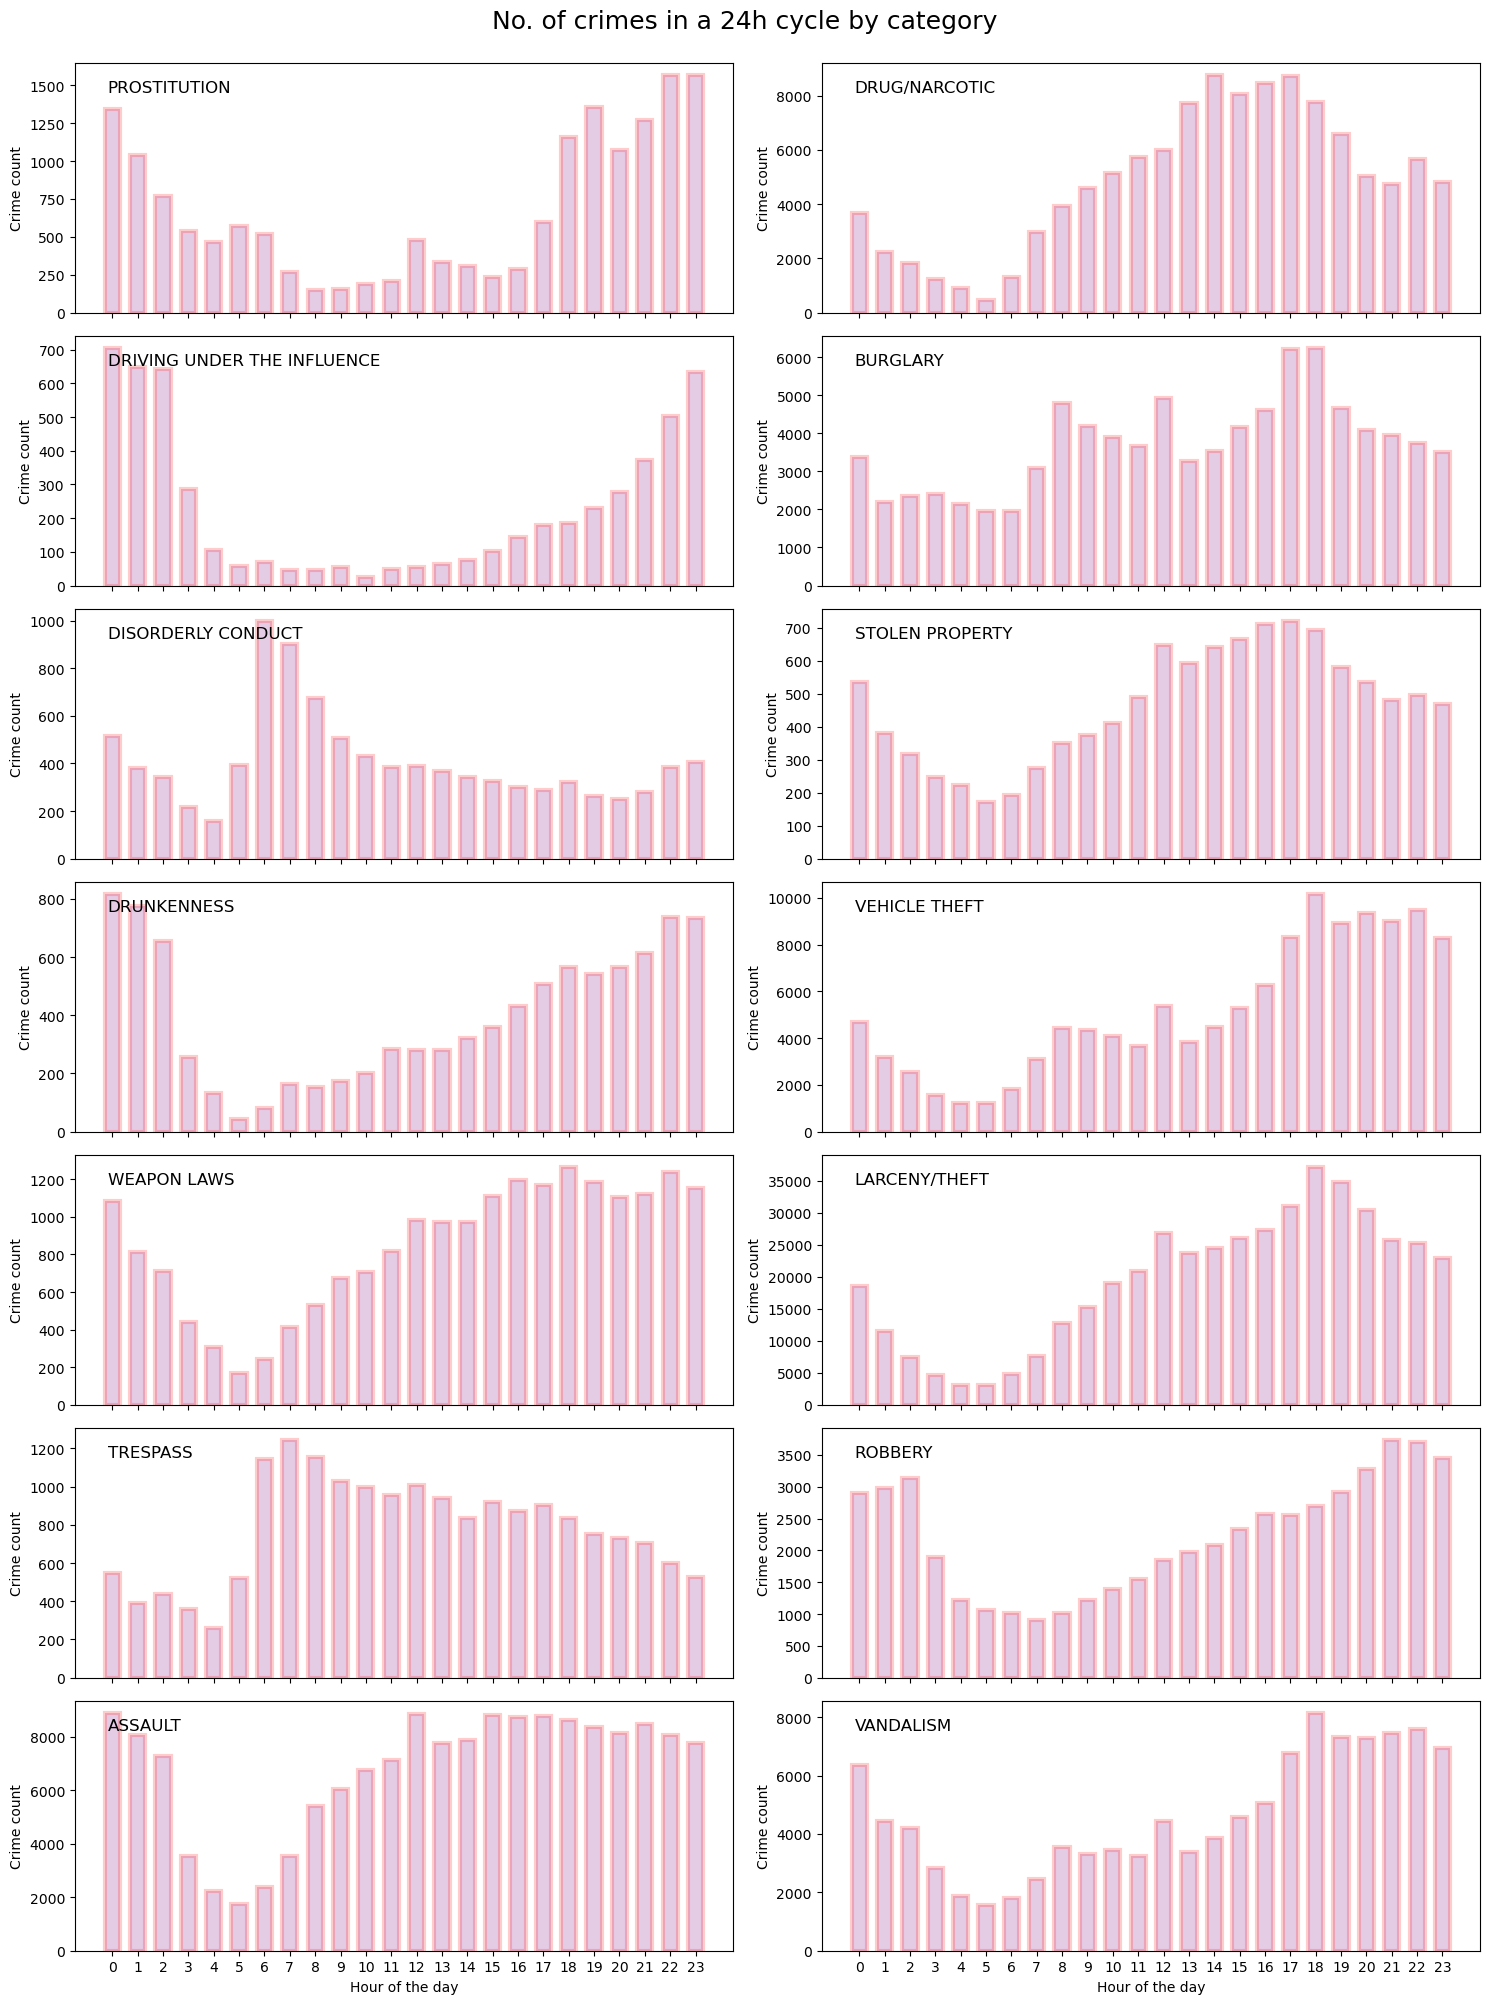

In [7]:
focusdata['Time'] = pd.to_datetime(focusdata['Time'])
focusdata['Hour'] = focusdata['Time'].dt.hour

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 20), sharex=True)
axes = axes.flatten()

grouped_data = focusdata.groupby(['Hour', 'Category']).size().reset_index(name='crime_count')

for i, crime in enumerate(list(focuscrimes)):
    ax = axes[i]
    crime_data = grouped_data[grouped_data['Category'] == crime]
    ax.bar(crime_data['Hour'].astype(str), crime_data['crime_count'], alpha=0.2, color='purple', edgecolor='red', linewidth=3, width=0.6)
    ax.set_title(f'{crime}', loc='left', y=0.85, x=0.05)
    ax.set_ylabel('Crime count')
    if i>=12:
      ax.set_xlabel('Hour of the day')
fig.suptitle('No. of crimes in a 24h cycle by category', size=18, y=1.0)
fig.tight_layout()

> The figure above illustrates the distribution of registered crimes based on the hour of the day, categorized by different crime types. Unlike the previous two analyses, this figure demonstrates significantly more variability.

>Generally, crime numbers tend to increase as the day progresses, with exceptions noted in disorderly conduct and trespass, where peak occurrences happen around 6 or 7 am. Across most crime categories, there is a notable decrease in numbers during the early morning hours, typically from around 3 am to 6 am.

>Drunkenness and DUI exhibit similar chart patterns, with both showing an increase in crime numbers as the day advances. However, drunkenness displays a slightly more gradual rise throughout the day compared to DUI.

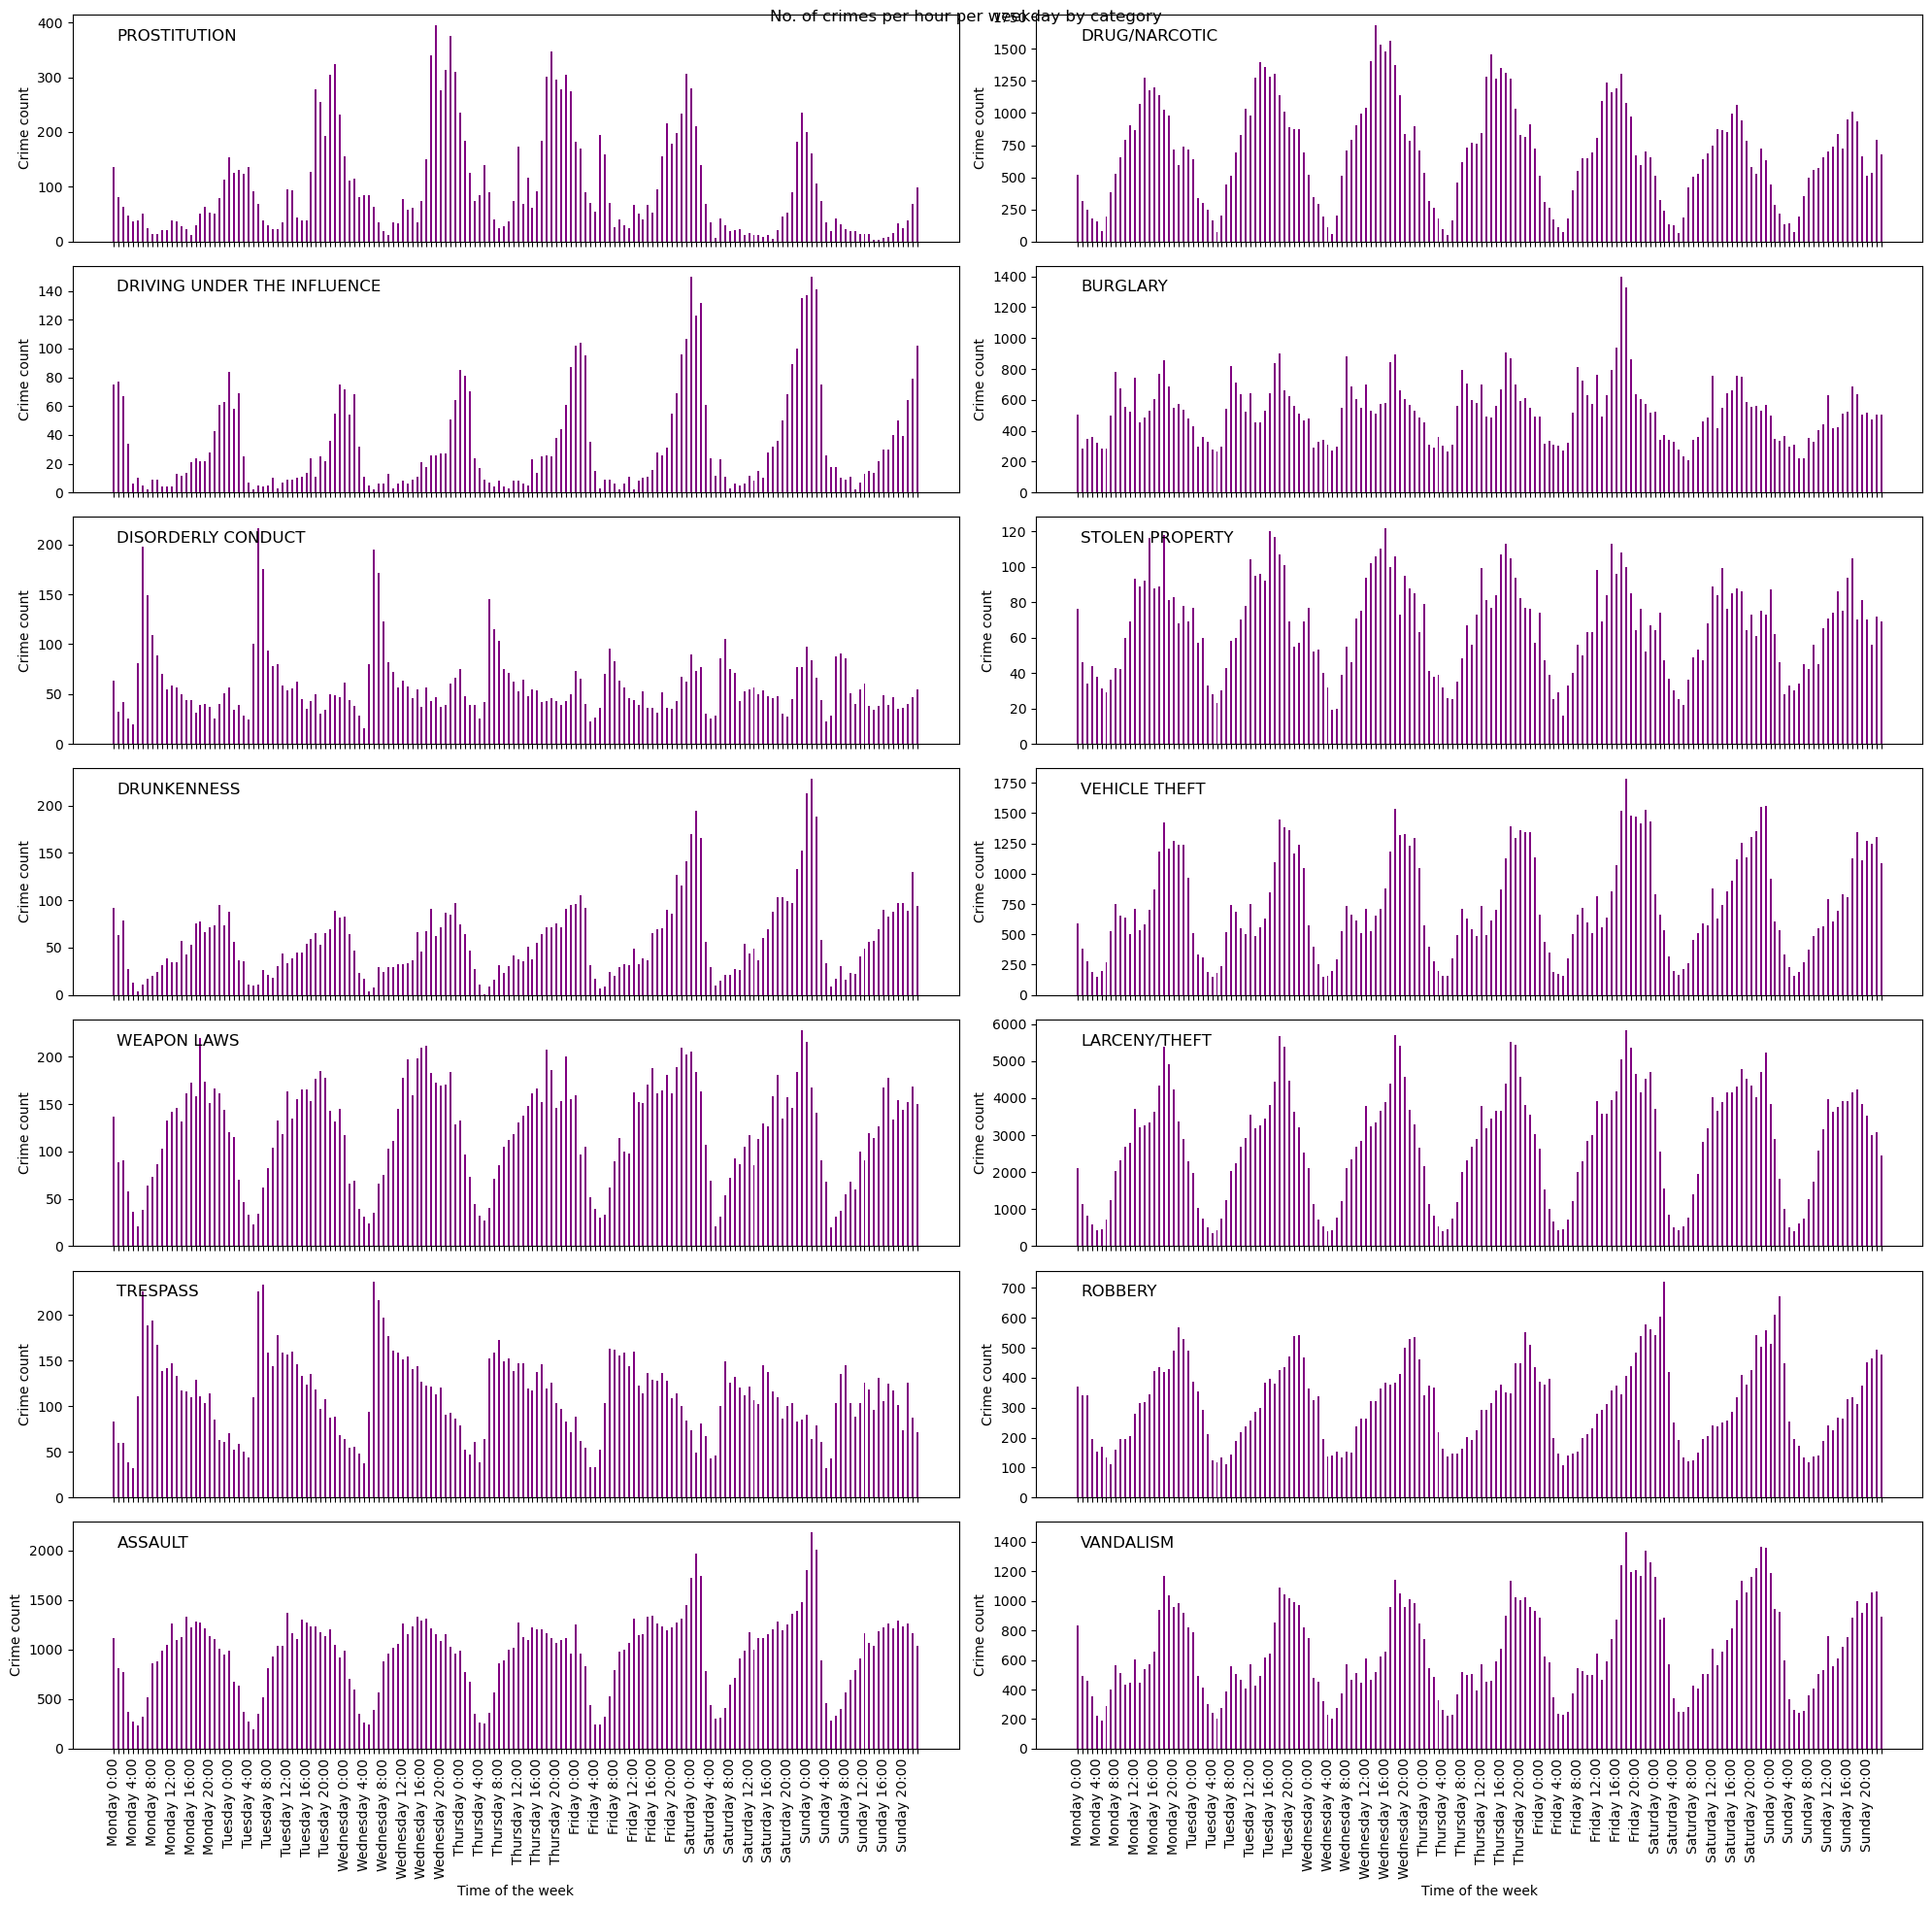

In [8]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(20, 20), sharex=True)
axes = axes.flatten()

grouped_data = focusdata.groupby(['DayOfWeek', 'Hour', 'Category']).size().reset_index(name='crime_count')
grouped_data['Time'] = grouped_data['DayOfWeek'].astype(str)+' '+grouped_data['Hour'].astype(str)+':00'

for i, crime in enumerate(list(focuscrimes)):
    ax = axes[i]
    crime_data = grouped_data[grouped_data['Category'] == crime]
    ax.bar(crime_data['Time'].astype(str), crime_data['crime_count'], color='purple', width=0.4)
    ax.set_title(f'{crime}', loc='left', y=0.85, x=0.05)
    ax.set_ylabel('Crime count')
    ax.tick_params('x', labelrotation=90)
    if i>=12:
      ax.set_xlabel('Time of the week')
    for i, label in enumerate(ax.get_xticklabels()):
      if i % 4 != 0:
        label.set_visible(False)
fig.suptitle('No. of crimes per hour per weekday by category')
fig.tight_layout()

> The figure above illustrates the distribution of registered crimes throughout the week, segmented by crime categories and hour of the day. Generally, the hourly crime patterns maintain a consistent shape throughout the week, although notable differences in numbers are observed for certain cases.

>For instance, burglary experiences a significant increase in numbers on Friday during the afternoon and evening hours compared to other days of the week. In contrast, disorderly conduct exhibits a substantial spike in the morning hours of Monday through Wednesday.

>Crimes such as vehicle theft or robbery display relatively steady patterns throughout the week, with a slight uptick noticeable on Friday afternoons for vehicle theft and during the late-night hours between Friday and Saturday for robbery.

>However, there is a deviation from the weekly pattern for assault, where the crime numbers unexpectedly rise during the early hours of Saturday and Sunday, in contrast to the steady decline observed at that time during the rest of the week.

* **Next choose a crime type that you like and create a calendar plot (Week 2, Part 4). Don't forget to comment on patterns you observe.**

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

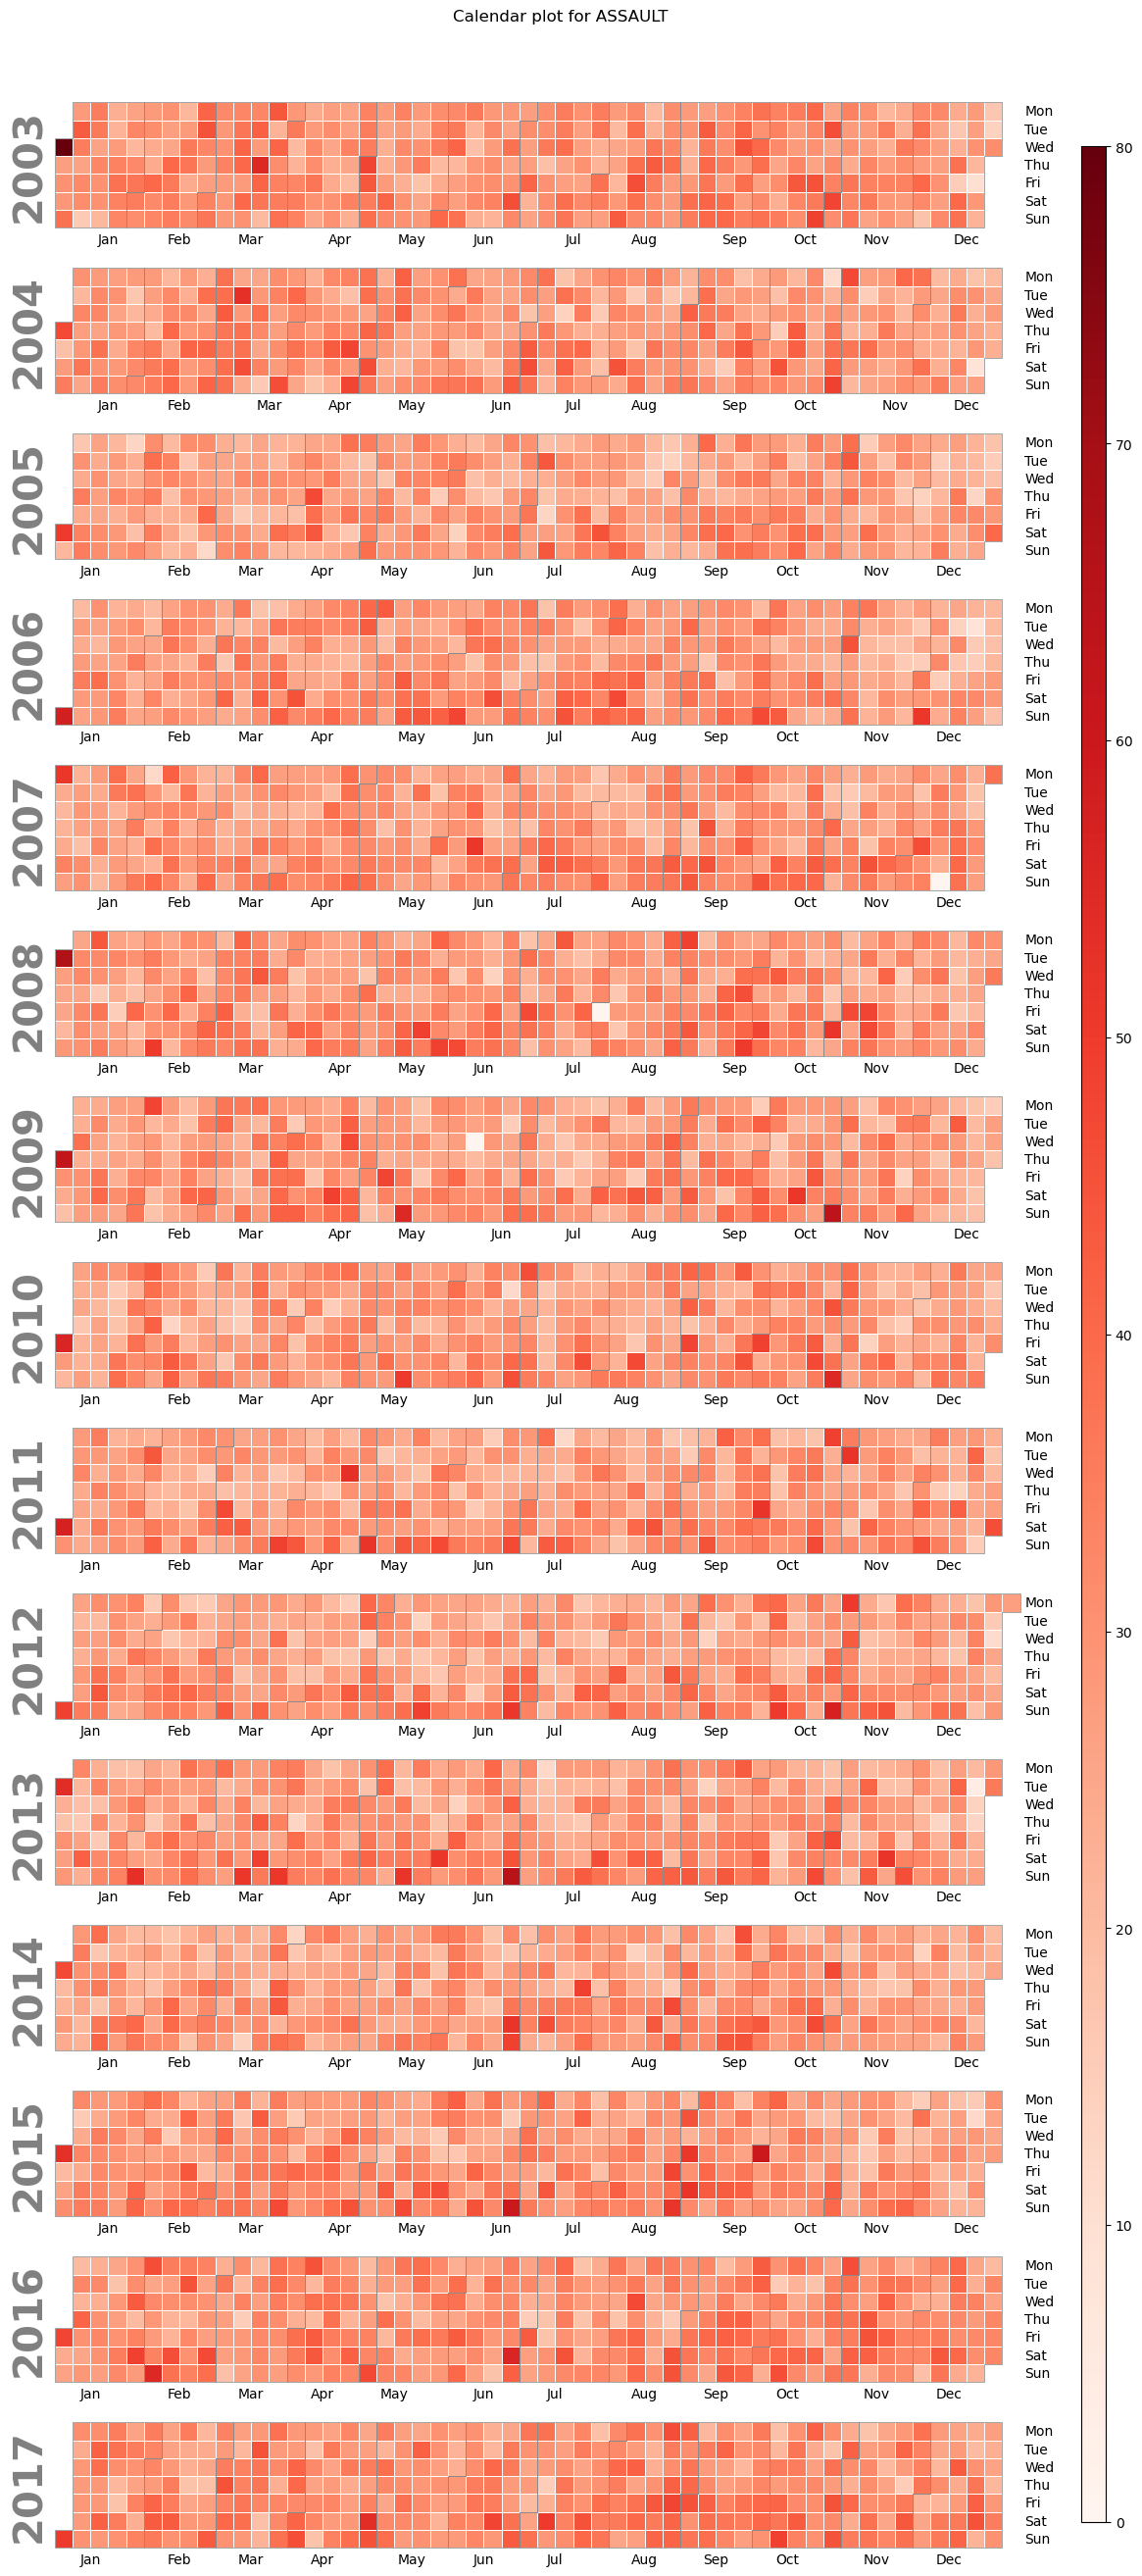

In [9]:
assault_data = focusdata[focusdata['Category']=='ASSAULT']
grouped_data = assault_data.groupby(['Date']).size()
calplot.calplot(grouped_data, cmap='Reds', colorbar=True, edgecolor='grey', linewidth=0.5, suptitle='Calendar plot for ASSAULT',)
plt.show()

> The figure illustrates a calendar plot representing the number of assault crimes committed between 2003 and 2017. Throughout this period, the assault numbers exhibit a relatively steady trend, showing no discernible increase or decrease over the years.

> One notable outlier is January 1st, 2003, which recorded the highest number of assaults reported for that year. Additionally, each year on New Year's Day, the assault count tends to be one of the highest for the entire year. Three other days of interest are in December 2007, July 2008, and June 2009, where the number of assaults is exceptionally low, nearly zero.

> Another intriguing observation is the period between 2010 and 2016, where a significantly higher number of assaults occur towards the end of June, predominantly on Sundays or Saturdays.

* **Finally, choose a different crime type and create a polar plot of its 24hour cycle (Week 2, Part 4). Again, don't forget to comment as you would in a figure text.**

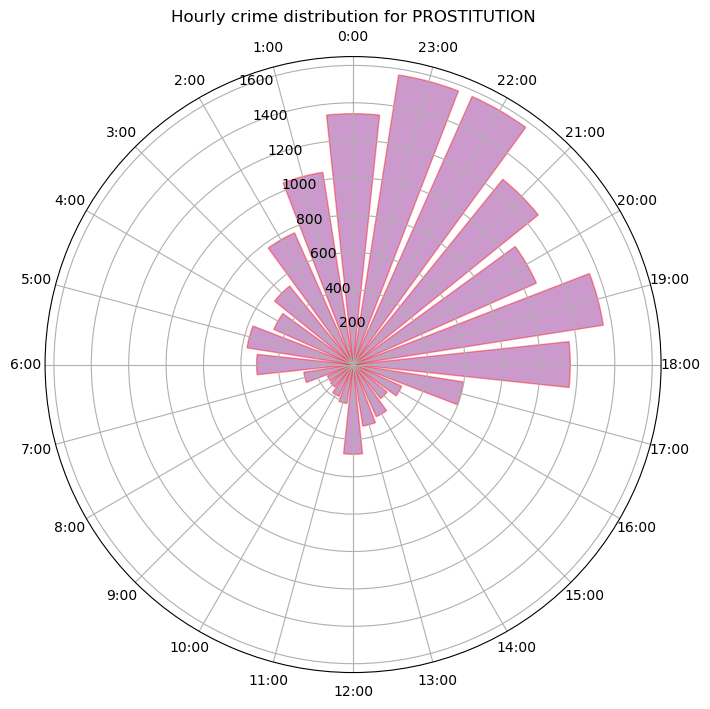

In [10]:
prostitution_data = focusdata[focusdata['Category']=='PROSTITUTION']
grouped_data = prostitution_data.groupby(['Hour']).size().reset_index(name='crime_count')
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

width = 2 * np.pi / len(grouped_data)

bars = ax.bar(np.arange(len(grouped_data)) * width, grouped_data['crime_count'], width=width-0.05, linewidth=1, alpha=0.4, color='purple', edgecolor='red',)

ax.set_xticks(np.linspace(0, 2*np.pi, len(grouped_data) + 1)[:-1])
ax.set_xticklabels([f'{hour}:00' for hour in grouped_data['Hour']])
ax.set_theta_zero_location('N')
ax.set_title(f'Hourly crime distribution for PROSTITUTION')

plt.show()

> The figure illustrates a polar plot depicting the distribution of prostitution crimes based on the hour of the day. The primary observation from the plot is that prostitution crimes are predominantly reported during the evening hours, specifically between 6 pm and 1 am.

> There is a significant disparity between daytime and nighttime occurrences. Between 7 am and 4 pm, the number of crimes remains below 400, with the exception of 12 pm, where it rises slightly. However, around 10-11 pm, the time with the most reported crimes, it reaches almost 1600, which is nearly four times higher than during the daytime hours.

* **Write a short reflection (max 400 words, shorter is OK) on how you've used LLMs to solve these assignments (or if you didn't use LLMs, explain why).**

> In general, we tried avoiding using LLMs, at least in the beginning of solving the exercise. While taking advantage of an LLM might greatly shorten the time of finishing an exercise, we feel that it also greatly shortens the time we remember the things we were supposed to learn. However, some exercises proved to be more tricky than others, and looking for help on the internet wasn't working for us, which is where we used an LLM. One example was the polar chart, where we asked for help with setting the xticks and xtick labels or how to show only every 4th xtick label in the 168h chart due to space constraints. Additionally, we found it beneficial to use an LLM for simple Python-related inquiries. Although such questions are typically searchable on Google, consulting an LLM proved quicker. For example, we might inquire about sorting a dataframe according to one field. We also appreciate using an LLM to review our written responses to assignments. It serves as a secondary opinion, helping to identify and correct typos and logical errors in our text.

## **A1 Part 2: Dataviz questions**

* **What is the difference between data and metadata? How does that relate to the GPS tracks-example?**


> Data is the unprocessed and raw set of the information and facts that help to spot the insights and patterns once it is cleaned and organized. It is the actual information that is being measured.


> Metadata is the information about the data, which makes working with the datasets much easier, since it provides the context and the meaning about the organization of the raw dataset like e.g. attributes, origin, time period, geographical region, description or title. Without such contextual information it is not possible to understand the data assets fully and extract enough value.





> In the context of the GPS tracks, the data would be the specific locations with latitude and longitude and the information related to them, while metadata could describe the timestamps and geographical coordinates of the recorded places or used device type.

* **Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that is difficult for the human eye to process visually. Explain why your example is difficult.**


> Yes, the human eye is a powerful tool for data analysis, since everyday we are exposed to different events, where we can quickly assess the situation and come up with a solution on how we can further act based on the extracted information.


> The human eye can quickly process and recognize the patterns and trends or spot the anomalies once the data is presented via the different visual plots.


> However the human eye has some limitations, especially when it comes to interpreting the large datasets. It is challenging for us to process such data, which can lead to the errors or the oversights of the important information. We are also more prone to create certain biases.



* **Simpson's paradox is hard to explain. Come up with your own example - or find one on line.**


> Simpson’s Paradox occurs when the data is gathered into the groups, which reverses the trend when the data is combined.


> For example, there are two friends - A and B, who are solving the exercises on two different days to prepare for the exam. B answered the higher number of the exercises correctly than A on both days.

```markdown
                           Day        |         A          |          B         
                   -------------------|--------------------|--------------------
                         1st day      |     7/8 = 87,5%    |     2/2 = 100%     
                         2nd day      |      1/2 = 50%     |     5/8 = 62,5%    
                   -------------------|--------------------|--------------------
                          Total       |     8/10 = 80%     |     7/10 = 70%     

```

>On the 1st day A solved more exercises, but B solved 2/2 (more accurate). On the second day B solved more and had higher accuracy. So even if B solved more exercises accurately on both days individually (7 out of 10), A solved them more accurately overall the whole weekend (8 out of 10).


> Winning in both groups, which leads to winning overall only occurs if the size of the group is equal. If the sizes of the groups are different the totals for each side might be dominated by particular groups, but these groups belong to different categories. Total numbers are dominated, where each friend solved 8 exercises, so A solved more.


* **In your own words, explain the differnece between exploratory and explanatory data analysis.**


> Exploratory data analysis (EDA) is the phase of the data analysis where the raw dataset is organized and processed until it provides insightful information and uncovers the relations and trends within it. There are many ways to explore the data including visualizing and summarizing the main characteristics, which help to determine the patterns, distributions or outliers - any details that will help to identify the key categories. Exploring the data is crucial since it gives the basic understanding of the dataset and the relation between the attributes.


> Explanatory data analysis (ExDA) is conducted after the exploratory phase and is about communicating the results and specific findings in a clear way, which would provide the evidence for previously stated hypotheses. It is crucial to validate the significance of the data and share the valuable information.

## A1 Part 3: Visualizing geodata using Plotly

In this sub-assignment I want you to create a choropleth map of San Francisco, showing where it's safest to leave your car on Sundays, following the instructions from Week 3.

When you're done, reflect on the following questions.

* Based on your map and analysis, where should you park the car for it to be safest on a Sunday? And where's the worst place?
* Using visualizatios can help us uncover powerful data-patterns. However, when designing visualizations, we need to be aware of several illusions that can lead viewers to misinterpret the data we are showing (i.e. perceptual errors):
   - Try to change the range of data-values in the plot above. Is there a way to make the difference between district less evident?
   - Why do you think perceptual errors are a problem? Try to think of a few examples.



* **Creating choropleth map of San Francisco, highlighting the vehicle theft crime count.**



In [11]:
with urlopen('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson') as response:
    counties = json.load(response)

choropleth_map_data = data.copy()
crime = 'VEHICLE THEFT'
day = 'Sunday'

# Filter data by desired day of the week and crime
map_data_sunday = choropleth_map_data.loc[choropleth_map_data['DayOfWeek'] == day]
map_data_crime = map_data_sunday.loc[map_data_sunday['Category'] == crime]

# Group the data by PdDistrict
map_data_district = map_data_crime.groupby(['PdDistrict']).size().reset_index(name='crime_count')

# Find the index of the maximum and minimum value in the 'crime_count' column
max_index = map_data_district['crime_count'].idxmax()
min_index = map_data_district['crime_count'].idxmin()

# Retrieve the corresponding crime count value
max_crime_count = map_data_district.loc[max_index, 'crime_count']
min_crime_count = map_data_district.loc[min_index, 'crime_count']

# Retrieve the corresponding district name
district_with_max_crime = map_data_district.loc[max_index, 'PdDistrict']
district_with_min_crime = map_data_district.loc[min_index, 'PdDistrict']

print(f"District with the highest crime count is {district_with_max_crime}: {max_crime_count}")
print(f"District with the highest crime count is {district_with_min_crime}: {min_crime_count}")

District with the highest crime count is INGLESIDE: 2825
District with the highest crime count is TENDERLOIN: 353


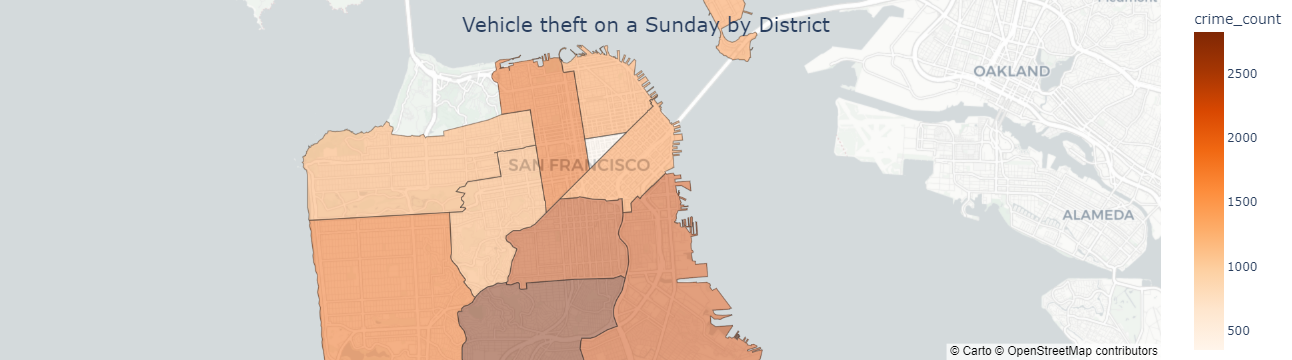

In [12]:
fig_original = px.choropleth_mapbox(map_data_district, geojson=counties, locations='PdDistrict', color='crime_count',
                                    color_continuous_scale="Oranges",
                                    range_color=(min_crime_count, max_crime_count),
                                    mapbox_style="carto-positron",
                                    zoom=11, center={"lat": 37.7749, "lon": -122.4194},
                                    opacity=0.5
                                    )

# Update layout to add title and annotations
fig_original.update_layout(
    title_text="Vehicle theft on a Sunday by District",
    title_font_size=20,
    title_x=0.5,
    title_y=0.95,
    margin={"r": 0, "t": 0, "l": 0, "b": 0},
)

# Show the figure
fig_original.show()



* **Based on your map and analysis, where should you park the car for it to be safest on a Sunday? And where's the worst place?**

> Based on the data analysis and the choropleth map of San Francisco on a Sunday it is the safest to leave a vehicle in the Tenderloin district. While leaving the vehicle in Ingleside district is potentially the most dangerous.





* **Try to change the range of data-values in the plot above. Is there a way to make the difference between district less evident?**



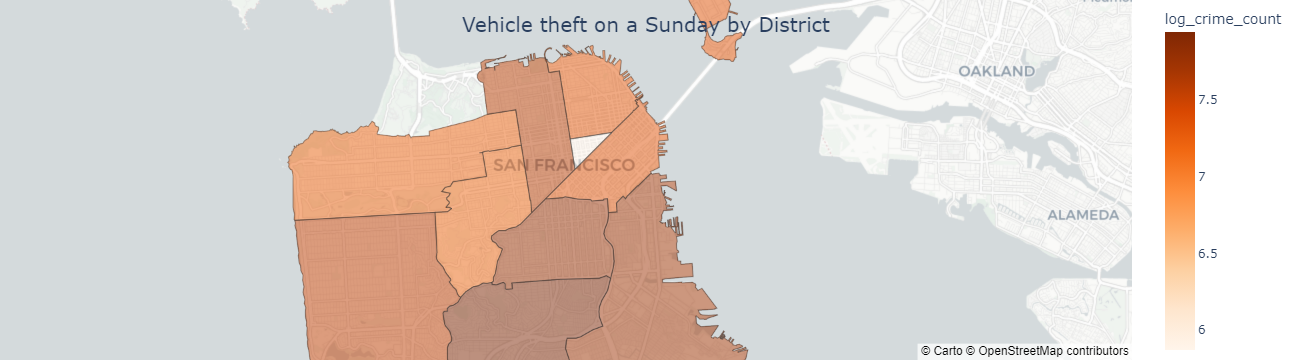

In [13]:
map_data_district['log_crime_count'] = np.log(map_data_district['crime_count'] + 1)

# Plotting the choropleth map with logarithmic scaling
fig_logarithmic = px.choropleth_mapbox(map_data_district, geojson=counties, locations='PdDistrict', color='log_crime_count',
                           color_continuous_scale="Oranges",
                           mapbox_style="carto-positron",
                           zoom=11, center={"lat": 37.7749, "lon": -122.4194},
                           opacity=0.5
                           )

# Update layout to add title and annotations
fig_logarithmic.update_layout(
    title_text="Vehicle theft on a Sunday by District",
    title_font_size=20,
    title_x=0.5,
    title_y=0.95,
    margin={"r": 0, "t": 0, "l": 0, "b": 0},
)

fig_logarithmic.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig_logarithmic.show()

> In the map above the data, the range has been compressed by changing the data scale from a linear to a logarithmic one. By doing so it is possible to make the difference between the districts become less apparent. That is because larger values are reduced more than smaller ones. Those differences become more apparent when analysing the neighbouring districts of Ingleside. When using a logarithmic scale risk of vehicle theft seems much higher in the Tarnaval, Mission and Bayview districts, than when using the Linera scale where a difference between those districts is more apparent.


   * **Why do you think perceptual errors are a problem? Try to think of a few examples.**

> Perceptual errors pose significant challenges as they can result in the misinterpretation of information. These errors are particularly evident in data visualization and user interface design, where colour choice and graphical representation play crucial roles.

> One common example of perceptual error occurs when utilizing colour schemes that differ from established conventions. For instance, humans tend to associate green with positive outcomes and red with negative ones. When creating a choropleth map or a graph that reverses this colour trend, individuals may draw incorrect conclusions about the presented data. This can distort the perception of information and confuse decision-making processes.

> Similarly, in user interface design, perceptual errors can manifest when colours are used to convey meaning. Green often signifies success, yellow serves as a warning, and red indicates an error. When these colour assignments deviate from users' expectations, it can lead to confusion and mistakes in interpreting interface elements.

> Moreover, in data visualization, perceptual errors may arise when altering the scale of the data representation. For instance, adjusting the scale to make differences between data points less apparent can obscure important insights and lead to misinterpretation of the underlying trends.



## A1 Part 4: Errors in the data

We started the course by plotting simple histogram and bar plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data (listed in Part 3 of Week 4).

The data errors we discovered at the end of Week 4 become hard (or impossible) to notice when we aggregate data (and when we calculate mean values, as well as statistics more generally). Thus, in a more general sense, we learn that when we visualize, data errors become difficult to identify when binning the data. We explore this process in the exercise below.

Use at most 125 words per sub-question.



* **In each of the 3 examples we listed during Week 4, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data.**

> Unusual or surprising pattern, it could be due to errors in data recording or reporting. For example, if law enforcement agencies or data collection systems are inconsistent in their recording practices on Thursdays, it may create a skewed representation of the actual trends.

> If there is a tendency for timestamps to be rounded to the nearest hour, 15 minutes, or increments of 10 minutes, it can lead to an inaccurate distribution of crime occurrences.

> If there are inconsistencies or inaccuracies in reporting sex offenses in the area, it may create a false perception of crime concentration. This bias can affect the binned versions of the data for that location, potentially leading to misconceptions about the safety or risk level.






* **Also, briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).**

> It can create a distorted representation of crime distribution, which can lead to inaccurate assessments of the crimes spots and trends, that could result in inappropriate interventions.

> It can also result in unjustified associations or correlations. If errors in having disproportional data affect certain demographics, areas, or types of crimes, it may lead to unwarranted stigmas or biases.

> Another aspect is the inaccurate effectiveness of predictive models. Models trained on biased or incomplete data may fail to capture the true complexity of criminal behavior, hindering their ability to make reliable predictions.






* **Find your own example of human noise in the data and visualize it.**



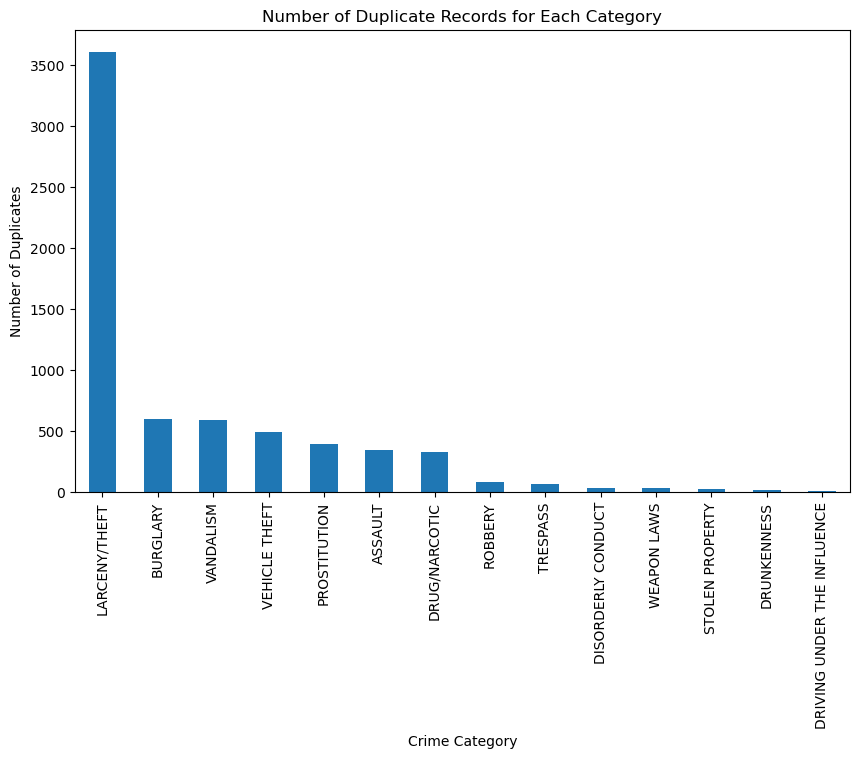

In [14]:
data_explore = data.copy()

focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])
data_explore = data_explore[data_explore['Category'].isin(focuscrimes)]
subset_fields = ['Category', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Address', 'X', 'Y', 'Descript']

# Find duplicate records based on the subset of fields
duplicate_records = data_explore[data_explore.duplicated(subset=subset_fields, keep=False)]

# Count the number of duplicates for each category
duplicate_counts = duplicate_records['Category'].value_counts()

plt.figure(figsize=(10, 6))
duplicate_counts.plot(kind='bar')
plt.title('Number of Duplicate Records for Each Category')
plt.xlabel('Crime Category')
plt.ylabel('Number of Duplicates')
plt.xticks(rotation=90)
plt.show()

> The data exploration revealed intriguing insights. The graph depicts the presence of duplicate records, indicating instances where identical crimes were reported with matching details such as crime type, date, time, location, and description. This occurrence suggests that multiple police units may have independently reported the same crime simultaneously, contributing to the duplication.



* **Did you find LLMs useful for anything in this exercise? Explain why/why not.**

> For exercise no 4 in Part 4 the LLMs have been used to come up with ideas about possible problems in the dataset analyzed. However, then each idea had to be checked manually to see if it was an issue in the dataset. This mix of using the LLMs to brainstorm ideas and then checking things manually helped to get a good grasp of potential problems or challenges in the dataset and in the end, resulted in finding that there were duplicated records in the dataset.



## A1 Part 5: Contributions
```markdown
|                         Part                         |        1         |        2         |        3         |        4         |
|------------------------------------------------------|------------------|------------------|------------------|------------------|
|        Weronika Straczek - s222754                   |        80%       |        10%       |        10%       |        33%       |
|        Gabriela Penarksa - s223289                   |        10%       |        80%       |        10%       |        33%       |
|        Michal Lehwark - s222999                      |        10%       |        10%       |        80%       |        33%       |
```